In [1]:
# Import libraries
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset into a pandas DataFrame
df = pd.read_csv('./certificates_leeds.csv', sep=",", low_memory=False)
df.head()


,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE
0,001dca82162cbdf798f746f53027c0cc82afda971d5e84...,Flat 2,35a Town Street,Farsley,LS28 5HX,10003805692,E,C,42,70,...,Leeds,Pudsey,PUDSEY,England and Wales: before 1900,2022-12-06 16:54:30,Rented (private),9.0,NaN,72736113.0,Energy Assessor
1,18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...,8 Sackville Street,NaN,NaN,LS7 2AS,10003489215,D,B,61,82,...,Leeds,Leeds North East,LEEDS,England and Wales: 1900-1929,2022-10-03 15:40:47,Rented (private),12.0,NaN,72658276.0,Energy Assessor
2,18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...,20 Highfield Gardens,NaN,NaN,LS12 4DU,10003423919,C,B,72,86,...,Leeds,Leeds West,LEEDS,England and Wales: 2007-2011,2022-10-25 07:49:22,Rented (social),6.0,NaN,72683080.0,Energy Assessor
3,18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...,17 Chestnut Gardens,NaN,NaN,LS12 4LP,10002989904,B,A,88,92,...,Leeds,Leeds West,Leeds,England and Wales: 1983-1990,2022-10-06 16:09:42,Owner-occupied,7.0,NaN,72266470.0,Address Matched
4,275687798052018050310193492080467,"9, Foxwood Farm Way",NaN,NaN,LS8 3EE,4759821668,D,B,58,87,...,Leeds,Leeds East,LEEDS,England and Wales: 1983-1990,2018-05-03 10:19:34,owner-occupied,NaN,NaN,72269527.0,Address Matched


In [3]:
# Display the summary statistics of the numerical columns
df.describe()

,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,...,NUMBER_OPEN_FIREPLACES,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,WIND_TURBINE_COUNT,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN
count,3.615480e+05,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361308.000000,361548.000000,361548.000000,361548.000000,...,355356.000000,0.0,0.0,340720.000000,41674.000000,170794.000000,214292.000000,179073.000000,125053.000000,3.552260e+05
mean,5.859219e+09,63.131454,77.478636,60.869414,75.221492,285.671880,181.833295,3.988426,49.824983,2.444247,...,0.060905,NaN,NaN,0.000564,5.796223,2.462364,0.357069,10.625482,5.736016,7.930974e+07
std,3.233824e+09,14.028153,11.282174,16.025048,13.584339,147.856443,131.715451,2.806036,25.925991,1.907233,...,0.347466,NaN,NaN,0.031770,6.788297,0.318246,4.022628,6.930916,5.488604,8.435316e+08
min,8.540000e+02,1.000000,1.000000,0.000000,0.000000,-90.000000,-224.000000,-4.200000,-68.000000,-4.200000,...,0.000000,NaN,NaN,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.317763e+07
25%,3.017455e+09,56.000000,73.000000,50.000000,69.000000,200.000000,108.000000,2.300000,35.000000,1.400000,...,0.000000,NaN,NaN,0.000000,3.600000,2.340000,0.000000,7.000000,2.000000,7.212800e+07
50%,6.044701e+09,65.000000,80.000000,62.000000,78.000000,263.000000,153.000000,3.500000,47.000000,2.000000,...,0.000000,NaN,NaN,0.000000,5.550000,2.410000,0.000000,9.000000,5.000000,7.226387e+07
75%,9.048179e+09,72.000000,85.000000,72.000000,84.000000,341.000000,218.000000,5.000000,60.000000,3.000000,...,0.000000,NaN,NaN,0.000000,7.600000,2.530000,0.000000,12.000000,8.000000,7.250714e+07
max,1.000423e+10,118.000000,140.000000,148.000000,148.000000,28007.000000,28007.000000,305.000000,4959.000000,207.000000,...,100.000000,NaN,NaN,1.000000,797.000000,39.820000,100.000000,167.000000,160.000000,2.000018e+11


In [4]:
# Checking the percentage of missing values in each column
missing_values = df.isnull().sum() * 100 / len(df)
missing_values.sort_values(ascending=False)

SHEATING_ENV_EFF                 100.000000
SHEATING_ENERGY_EFF              100.000000
COUNTY                            99.999723
FLOOR_ENV_EFF                     93.755186
FLAT_STOREY_COUNT                 92.573047
                                    ...    
CO2_EMISS_CURR_PER_FLOOR_AREA      0.000000
CO2_EMISSIONS_POTENTIAL            0.000000
TOTAL_FLOOR_AREA                   0.000000
SECONDHEAT_DESCRIPTION             0.000000
HOTWATER_DESCRIPTION               0.000000
Length: 92, dtype: float64

In [5]:
# Drop columns with more than 50% missing values
missing_values = df.isnull().sum() * 100 / len(df)
df = df.drop(columns=missing_values[missing_values > 50].index.tolist())

# Check the shape of the dataframe after dropping columns
df.shape


(361548, 79)

In [6]:
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()

# Separate numerical and categorical columns
num_cols = df[missing_cols].select_dtypes(include=['int64', 'float64']).columns
cat_cols = df[missing_cols].select_dtypes(include=['object', 'bool']).columns

# Fill missing values in numerical columns with column median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical columns with most frequent category
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check if there are still any missing values
df.isnull().sum().sum()

0

In [7]:
# Randomly sample 2% of the data
df_sample = df.sample(frac=0.02, random_state=42)

# Display the shape of the sample
df_sample.shape

(7231, 79)

In [8]:
# Define the target variable
target = 'ENERGY_CONSUMPTION_CURRENT'

# Separate the features and the target variable
X_sample = df_sample.drop(target, axis=1)
y_sample = df_sample[target]

# Apply one-hot encoding to the categorical columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols)], remainder='passthrough')
X_sample = pd.DataFrame(ct.fit_transform(X_sample).toarray())

# Apply feature scaling to the features
scaler = StandardScaler()
X_sample = scaler.fit_transform(X_sample)

# Display the shape of the features
X_sample.shape


(7231, 41166)

In [9]:
# Calculate the mutual information scores
mi_scores = mutual_info_regression(X_sample, y_sample)

# Create a DataFrame to hold the scores
mi_scores_df = pd.DataFrame({'Feature': range(X_sample.shape[1]), 'Score': mi_scores})

# Sort the DataFrame by the scores in descending order and select the top 30 features
selected_features = mi_scores_df.sort_values('Score', ascending=False).head(30)['Feature'].values

# Select these features from our feature set
X_sample_selected = X_sample[:, selected_features]

# Display the shape of the selected feature set
X_sample_selected.shape


(7231, 30)

In [10]:
# Split the sample data into training and test sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample_selected, y_sample, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model on the sample data
lr_model_sample = LinearRegression()
lr_model_sample.fit(X_train_sample, y_train_sample)

# Make predictions on the test data
lr_predictions_sample = lr_model_sample.predict(X_test_sample)

# Evaluate the model
lr_rmse_sample = np.sqrt(mean_squared_error(y_test_sample, lr_predictions_sample))
lr_mae_sample = mean_absolute_error(y_test_sample, lr_predictions_sample)

lr_rmse_sample, lr_mae_sample


(16.5001667446207, 9.941242531546807)

In [11]:
# Initialize and train the Decision Tree model on the sample data
dt_model_sample = DecisionTreeRegressor(random_state=42)
dt_model_sample.fit(X_train_sample, y_train_sample)

# Make predictions on the test data
dt_predictions_sample = dt_model_sample.predict(X_test_sample)

# Evaluate the model
dt_rmse_sample = np.sqrt(mean_squared_error(y_test_sample, dt_predictions_sample))
dt_mae_sample = mean_absolute_error(y_test_sample, dt_predictions_sample)

dt_rmse_sample, dt_mae_sample


(20.00699601205537, 11.150656530753283)

In [12]:
# Initialize and train the Random Forest model on the sample data
rf_model_sample = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_sample.fit(X_train_sample, y_train_sample)

# Make predictions on the test data
rf_predictions_sample = rf_model_sample.predict(X_test_sample)

# Evaluate the model
rf_rmse_sample = np.sqrt(mean_squared_error(y_test_sample, rf_predictions_sample))
rf_mae_sample = mean_absolute_error(y_test_sample, rf_predictions_sample)

rf_rmse_sample, rf_mae_sample


(15.894735786050743, 8.79206634416033)

In [13]:
# Initialize and train the Gradient Boosting model on the sample data
gb_model_sample = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_sample.fit(X_train_sample, y_train_sample)

# Make predictions on the test data
gb_predictions_sample = gb_model_sample.predict(X_test_sample)

# Evaluate the model
gb_rmse_sample = np.sqrt(mean_squared_error(y_test_sample, gb_predictions_sample))
gb_mae_sample = mean_absolute_error(y_test_sample, gb_predictions_sample)

gb_rmse_sample, gb_mae_sample


(16.373210878060604, 10.176084270743159)

In [14]:
# Create a DataFrame to hold the evaluation metrics of each model
model_performance_sample = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Sample Data RMSE': [lr_rmse_sample, dt_rmse_sample, rf_rmse_sample, gb_rmse_sample],
    'Sample Data MAE': [lr_mae_sample, dt_mae_sample, rf_mae_sample, gb_mae_sample]
})

model_performance_sample


,Model,Sample Data RMSE,Sample Data MAE
0,Linear Regression,16.500167,9.941243
1,Decision Tree,20.006996,11.150657
2,Random Forest,15.894736,8.792066
3,Gradient Boosting,16.373211,10.176084


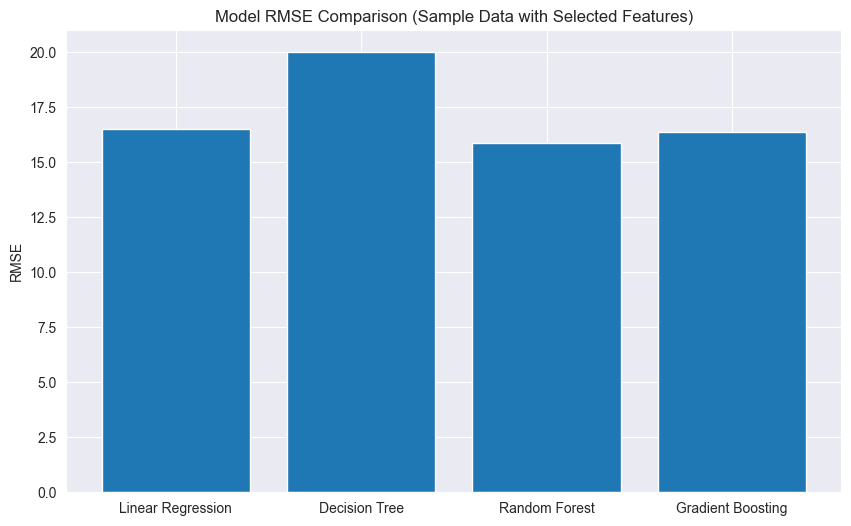

In [15]:
# Create a bar plot showing the RMSE of each model
plt.figure(figsize=(10, 6))
plt.bar(model_performance_sample['Model'], model_performance_sample['Sample Data RMSE'])
plt.title('Model RMSE Comparison (Sample Data with Selected Features)')
plt.ylabel('RMSE')
plt.show()

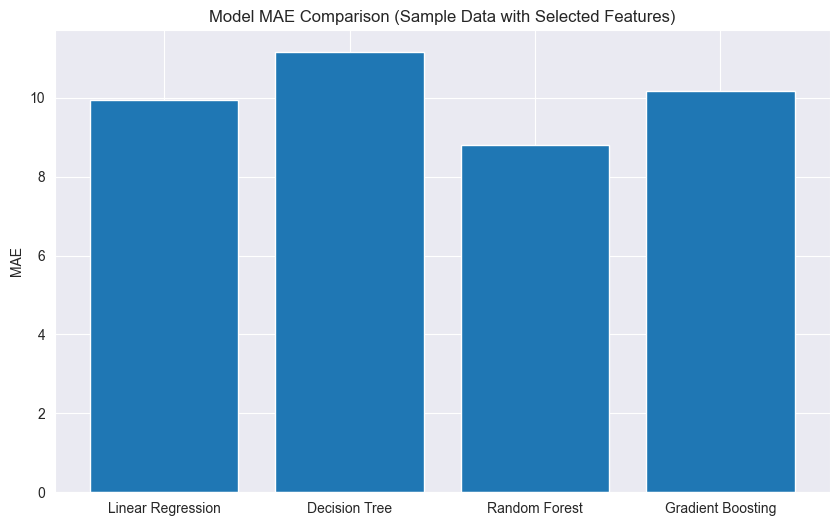

In [16]:
# Create a bar plot showing the MAE of each model
plt.figure(figsize=(10, 6))
plt.bar(model_performance_sample['Model'], model_performance_sample['Sample Data MAE'])
plt.title('Model MAE Comparison (Sample Data with Selected Features)')
plt.ylabel('MAE')
plt.show()


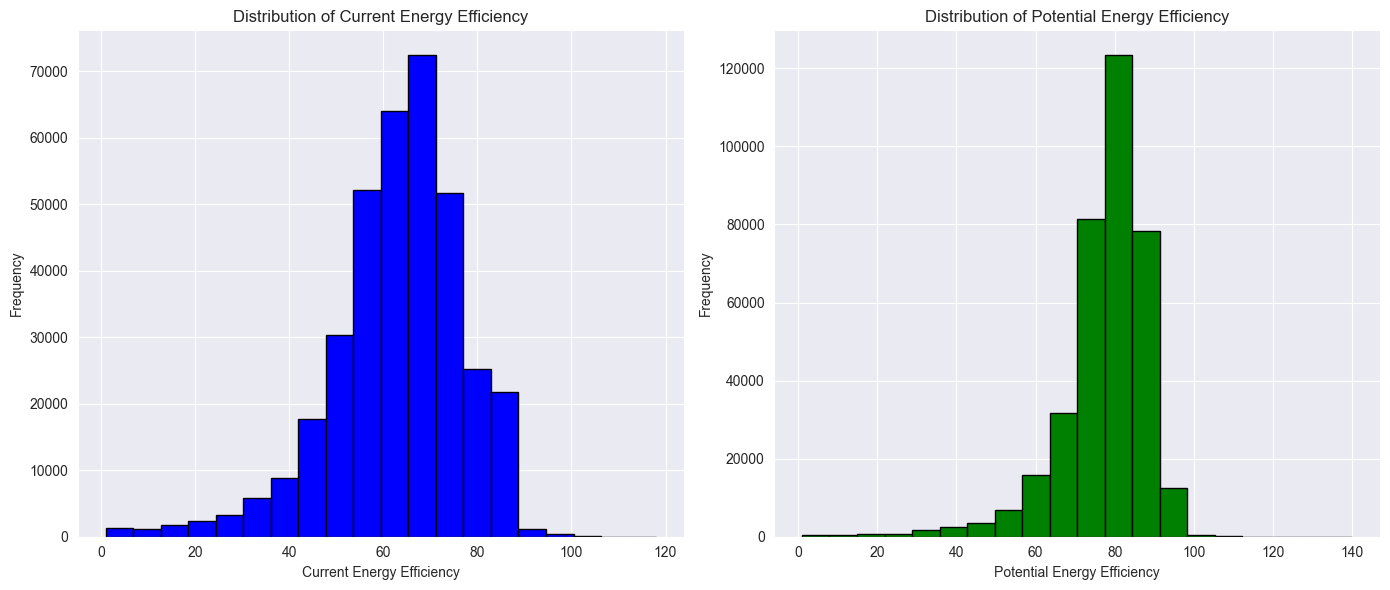

In [17]:
# Plot histograms of the 'CURRENT_ENERGY_EFFICIENCY' and 'POTENTIAL_ENERGY_EFFICIENCY' columns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['CURRENT_ENERGY_EFFICIENCY'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Current Energy Efficiency')
plt.xlabel('Current Energy Efficiency')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['POTENTIAL_ENERGY_EFFICIENCY'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Potential Energy Efficiency')
plt.xlabel('Potential Energy Efficiency')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


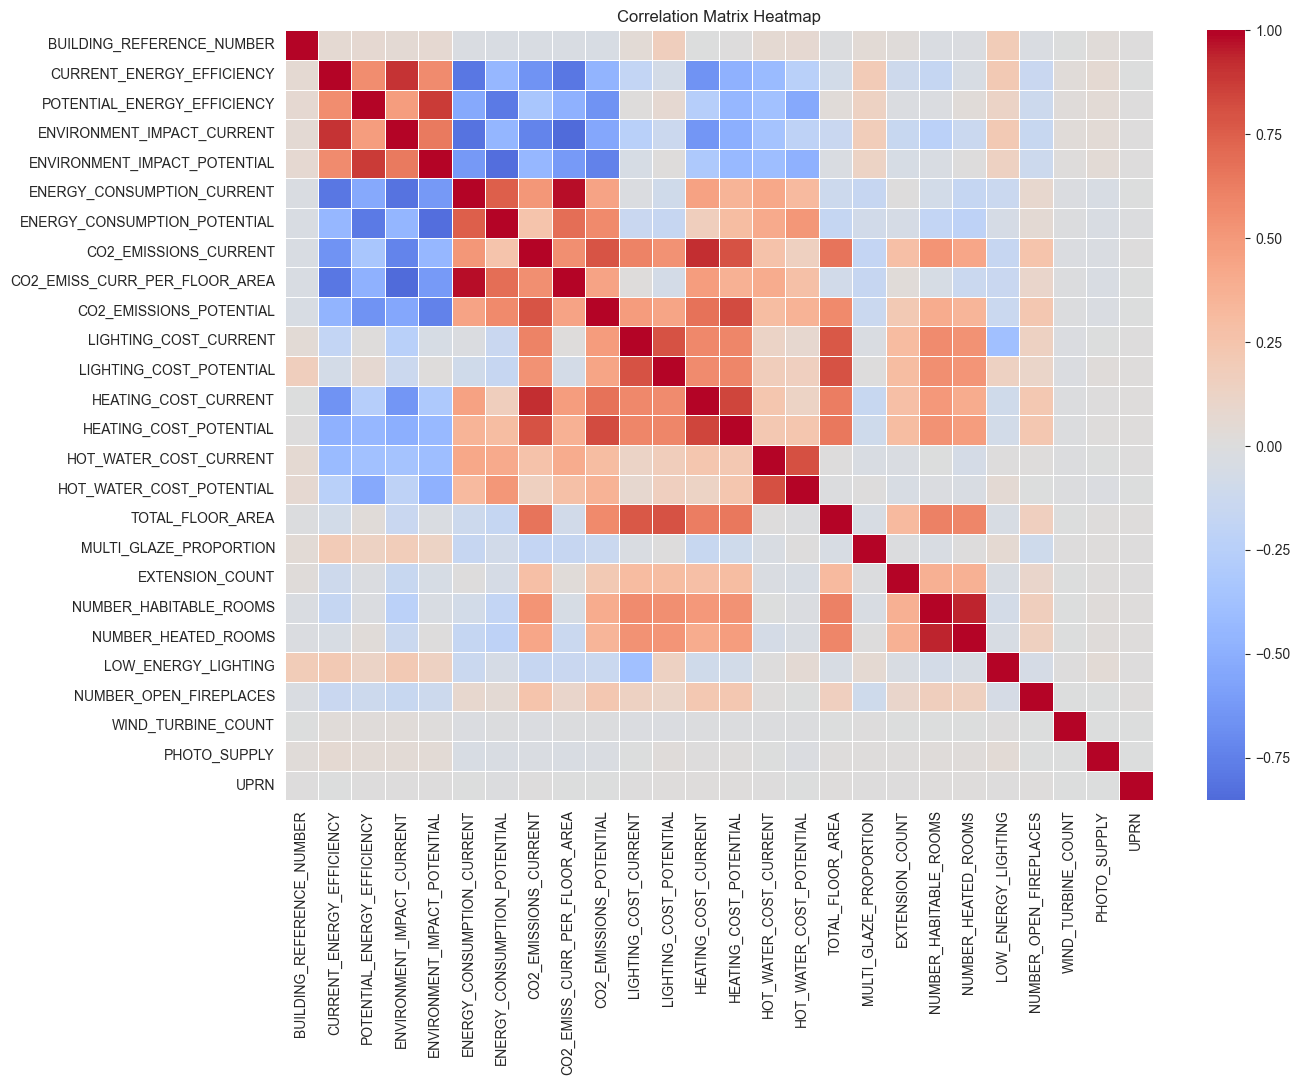

In [18]:
# Calculate the correlation matrix of the numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


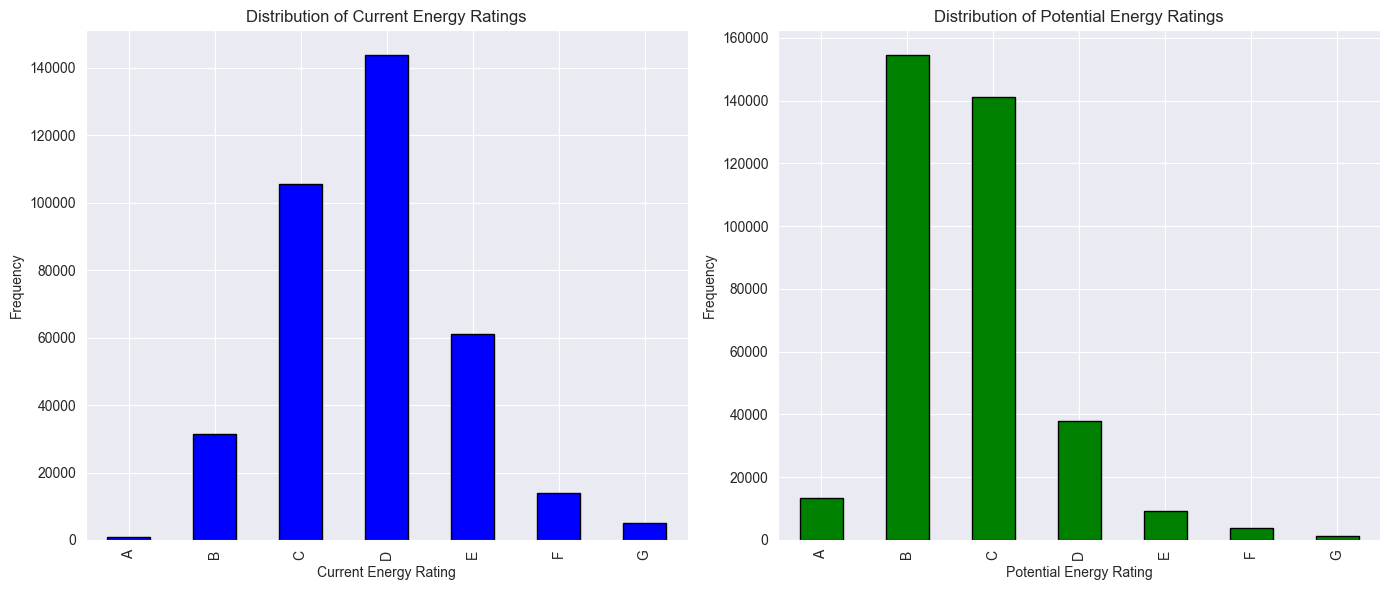

In [19]:
# Plot bar plots of the 'CURRENT_ENERGY_RATING' and 'POTENTIAL_ENERGY_RATING' columns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df['CURRENT_ENERGY_RATING'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Current Energy Ratings')
plt.xlabel('Current Energy Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['POTENTIAL_ENERGY_RATING'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Potential Energy Ratings')
plt.xlabel('Potential Energy Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


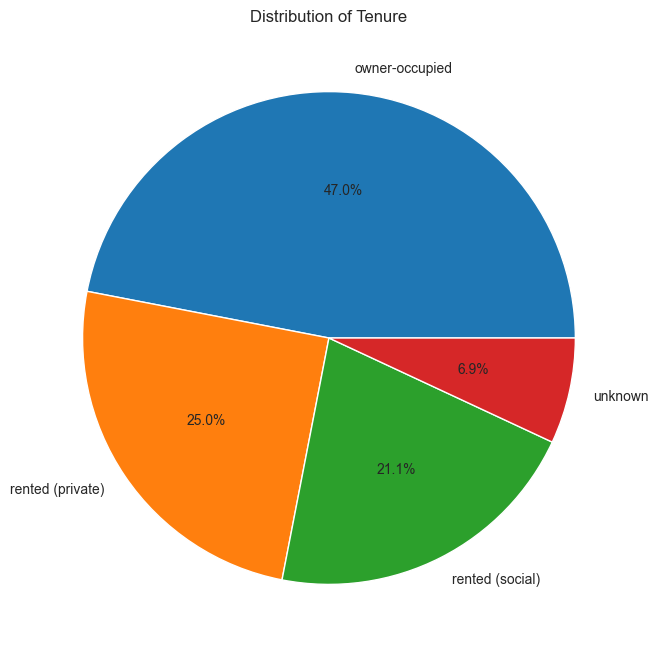

In [20]:
# Standardize the 'TENURE' column
df['TENURE'] = df['TENURE'].str.lower().replace({'rental (private)': 'rented (private)', 'rental (social)': 'rented (social)'})
df['TENURE'] = df['TENURE'].str.lower().replace(["not defined - use in the case of a new dwelling for which the intended tenure in not known. it is no", "unknown", "no data!"], "unknown")
# Plot the updated distribution
df['TENURE'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Distribution of Tenure')
plt.ylabel('')
plt.show()
